In [6]:
# ANALISIS DATA STUDENT PERFORMANCE

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Load Dataset

df = pd.read_csv("StudentPerformanceFactors.csv")

print("Ukuran dataset:", df.shape)
print("Info dataset:")
print(df.info())

Ukuran dataset: (6607, 20)
Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_In

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 2. Preprocessing

print("=== Sebelum Preprocessing ===")
print(df.info())
print(df.isna().sum())
print("-" * 50)

=== Sebelum Preprocessing ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence    

In [8]:
# Handling Missing Values
# Ganti missing value di kolom kategorikal dengan modus
for col in df.select_dtypes(include='object').columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Ganti missing value di kolom numerik dengan median
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

print("Missing values berhasil ditangani")
print(df.isna().sum())
print("-" * 50)

Missing values berhasil ditangani
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64
--------------------------------------------------


In [9]:
#  Handling Outliers
# Winsorization (IQR method)
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

print("Outlier ditangani dengan metode Winsorization (IQR)")
print(df.describe().T)
print("-" * 50)

Outlier ditangani dengan metode Winsorization (IQR)
                    count       mean        std   min   25%   50%   75%    max
Hours_Studied      6607.0  19.971848   5.951016   4.0  16.0  20.0  24.0   36.0
Attendance         6607.0  79.977448  11.547475  60.0  70.0  80.0  90.0  100.0
Sleep_Hours        6607.0   7.029060   1.468120   4.0   6.0   7.0   8.0   10.0
Previous_Scores    6607.0  75.070531  14.399784  50.0  63.0  75.0  88.0  100.0
Tutoring_Sessions  6607.0   1.436355   1.096018   0.0   1.0   1.0   2.0    3.5
Physical_Activity  6607.0   2.967610   1.031231   0.0   2.0   3.0   4.0    6.0
Exam_Score         6607.0  67.127138   3.372908  59.0  65.0  67.0  69.0   75.0
--------------------------------------------------


In [10]:
#  Encoding Categorical Variables
cat_cols = ['Gender', 'School_Type', 'Family_Income', 'Motivation_Level']
existing_cols = [c for c in cat_cols if c in df.columns]  # cek agar tidak error jika kolom sudah hilang
if existing_cols:
    encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    encoded = encoder.fit_transform(df[existing_cols])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(existing_cols))
    df = pd.concat([df.drop(columns=existing_cols).reset_index(drop=True),
                    encoded_df.reset_index(drop=True)], axis=1)
    print(f"Encoding berhasil. Kolom baru: {list(encoded_df.columns)}")
else:
    print("Tidak ada kolom kategorikal yang perlu di-encode.")

print("-" * 50)

Encoding berhasil. Kolom baru: ['Gender_Male', 'School_Type_Public', 'Family_Income_Low', 'Family_Income_Medium', 'Motivation_Level_Low', 'Motivation_Level_Medium']
--------------------------------------------------


In [11]:
#  Feature Scaling
scaler = StandardScaler()
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Feature scaling selesai (StandardScaler digunakan)")
print(df.head())
print("-" * 50)

print("=== Setelah Preprocessing ===")
print(df.info())

Feature scaling selesai (StandardScaler digunakan)
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0       0.508885    0.348375                  Low                High   
1      -0.163320   -1.383736                  Low              Medium   
2       0.676936    1.560853               Medium              Medium   
3       1.517192    0.781403                  Low              Medium   
4      -0.163320    1.041220               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Internet_Access  \
0                         No    -0.019796        -0.143800             Yes   
1                         No     0.661399        -1.116110             Yes   
2                        Yes    -0.019796         1.106313             Yes   
3                        Yes     0.661399         1.592469             Yes   
4                        Yes    -0.700990        -0.699406             Yes   

   Tutoring_Sessions Teacher_Quality  ...

In [12]:
# Feature Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[num_cols])
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

print("\nExplained variance ratio (2 komponen pertama):")
print(pca.explained_variance_ratio_)


Explained variance ratio (2 komponen pertama):
[0.14610313 0.12841874]


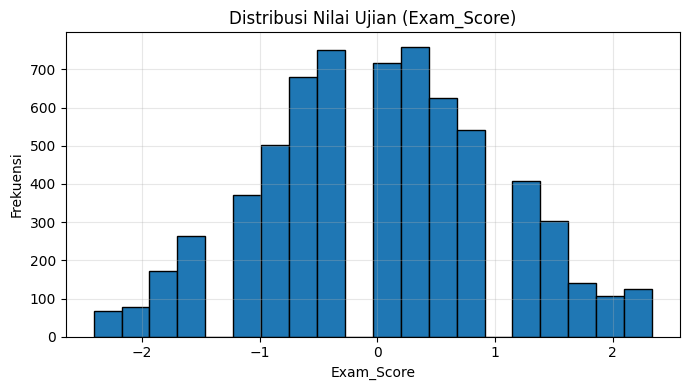

In [13]:
# Visualisasi
# Histogram Exam_Score
plt.figure(figsize=(7, 4))
plt.hist(df['Exam_Score'], bins=20, edgecolor='black')
plt.title('Distribusi Nilai Ujian (Exam_Score)')
plt.xlabel('Exam_Score')
plt.ylabel('Frekuensi')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

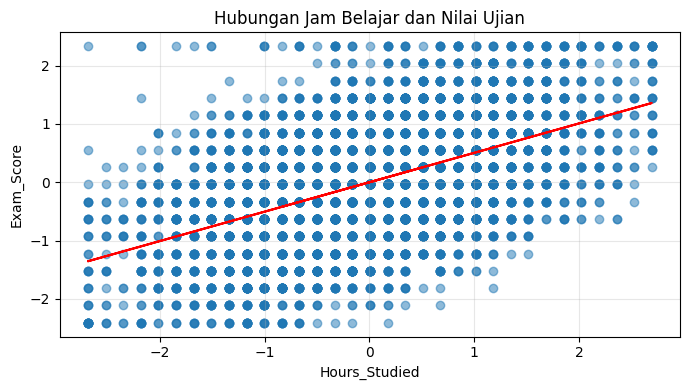

In [14]:
# Scatter Plot Hours_Studied vs Exam_Score
plt.figure(figsize=(7, 4))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.5)
m, b = np.polyfit(df['Hours_Studied'], df['Exam_Score'], 1)
plt.plot(df['Hours_Studied'], m*df['Hours_Studied'] + b, color='red')
plt.title('Hubungan Jam Belajar dan Nilai Ujian')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

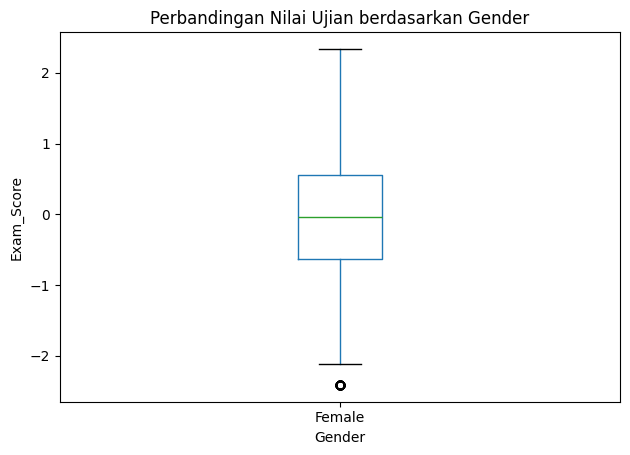

In [15]:
# Boxplot Exam_Score by Gender
if 'Gender_Male' in df.columns:
    df['Gender'] = np.where(df['Gender_Male'] == 1, 'Male', 'Female')
plt.figure(figsize=(6, 4))
df.boxplot(column='Exam_Score', by='Gender', grid=False)
plt.title('Perbandingan Nilai Ujian berdasarkan Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()

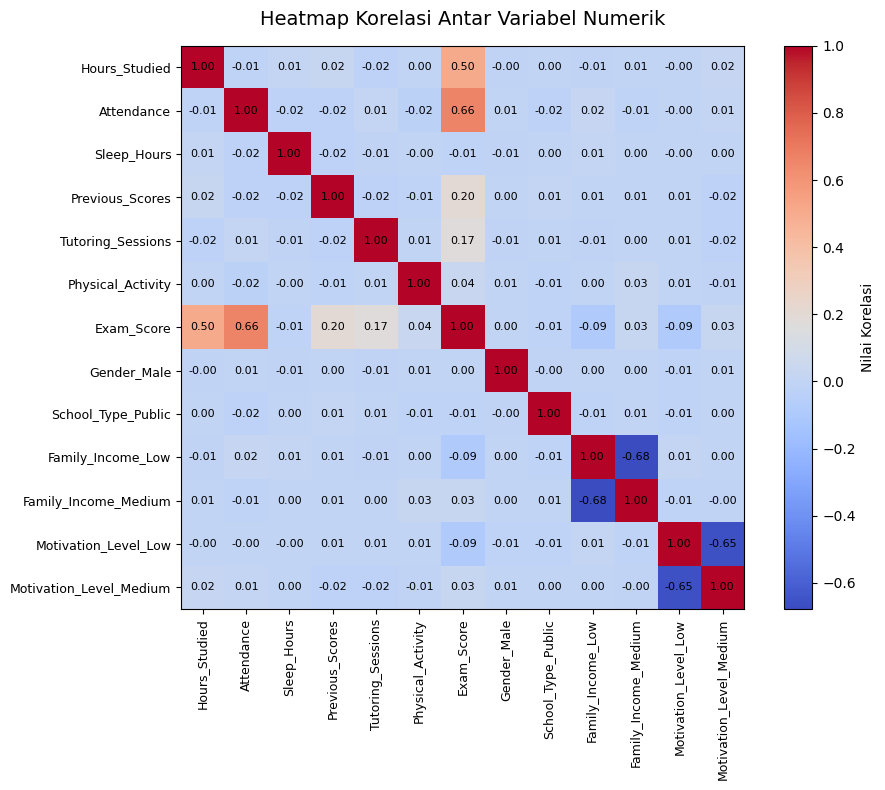

In [16]:
# Heatmap Korelasi
import matplotlib.pyplot as plt
import numpy as np

corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Nilai Korelasi')
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=14, pad=15)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=9)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=9)

# Menampilkan nilai korelasi di setiap sel
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black', fontsize=8)


plt.grid(False)
plt.tight_layout()
plt.show()


In [17]:
from scipy import stats
import numpy as np

# Parametric Test: Independent T-test (Gender)
if 'Gender_Male' in df.columns:
    male_scores = df[df['Gender_Male'] > 0]['Exam_Score']
    female_scores = df[df['Gender_Male'] < 0]['Exam_Score']

    if len(male_scores) > 1 and len(female_scores) > 1:
        levene_stat, levene_p = stats.levene(male_scores, female_scores)
        equal_var = levene_p > 0.05

        tstat, pvalue = stats.ttest_ind(male_scores, female_scores, equal_var=equal_var)

        cohens_d = (male_scores.mean() - female_scores.mean()) / \
            np.sqrt((male_scores.std()**2 + female_scores.std()**2) / 2)

        mean_diff = male_scores.mean() - female_scores.mean()
        se = np.sqrt(male_scores.var()/len(male_scores) + female_scores.var()/len(female_scores))
        ci = stats.t.interval(0.95, len(male_scores)+len(female_scores)-2, loc=mean_diff, scale=se)

        print("\nIndependent T-test (Gender)")
        print(f"Jumlah data Laki-laki : {len(male_scores)}, Perempuan : {len(female_scores)}")
        print(f"Levene p-value (Homogenitas varians): {levene_p:.4f}")
        print(f"T-statistic : {tstat:.4f}")
        print(f"p-value : {pvalue:.4f}")
        print(f"Cohen's d : {cohens_d:.4f}")
        print(f"Perbedaan rata-rata (Male - Female) : {mean_diff:.4f}")
        print(f"95% Confidence Interval : {ci}")
    else:
        print("Tidak cukup data pada salah satu kelompok gender.")
else:
    print("Kolom 'Gender_Male' tidak ditemukan dalam dataset.")


# Non-Parametric Test: Spearman Correlation
if 'Hours_Studied' in df.columns and 'Exam_Score' in df.columns:
    rho, p_spear = stats.spearmanr(df['Hours_Studied'], df['Exam_Score'])
    print("\nSpearman Correlation")
    print(f"Koefisien korelasi (ρ): {rho:.4f}")
    print(f"p-value : {p_spear:.4f}")

    # Interpretasi otomatis
    if p_spear < 0.05:
        print("Interpretasi: Korelasi signifikan antara jam belajar dan nilai ujian.")
    else:
        print("Interpretasi: Tidak terdapat korelasi signifikan antara jam belajar dan nilai ujian.")
else:
    print("Kolom Hours_Studied atau Exam_Score tidak ditemukan.")


Independent T-test (Gender)
Jumlah data Laki-laki : 3814, Perempuan : 2793
Levene p-value (Homogenitas varians): 0.3585
T-statistic : 0.3551
p-value : 0.7225
Cohen's d : 0.0088
Perbedaan rata-rata (Male - Female) : 0.0088
95% Confidence Interval : (np.float64(-0.04012737022607361), np.float64(0.0578170933117978))

Spearman Correlation
Koefisien korelasi (ρ): 0.4811
p-value : 0.0000
Interpretasi: Korelasi signifikan antara jam belajar dan nilai ujian.
